In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt
import cv2
import os

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2
# Define dataset directory paths
train_data_dir = '/content/drive/MyDrive/NN assignments/medical equipment data sets/training'
test_data_dir = '/content/drive/MyDrive/NN assignments/medical equipment data sets/testing'

# Define preprocessing function
def preprocess_img(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    img = cv2.resize(img, (64, 64))  # Resize the image to 64x64 (same size as MNIST)
    img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    return img

# Load training data
train_images = []
train_labels = []
i=0
for class_label in os.listdir(train_data_dir):
    class_dir = os.path.join(train_data_dir, class_label)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = preprocess_img(img_path)
        train_images.append(img)
        train_labels.append(i)  # folder names represent class labels
    i=i+1

# Load testing data
test_images = []
test_labels = []
i=0
for class_label in os.listdir(test_data_dir):
    class_dir = os.path.join(test_data_dir, class_label)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = preprocess_img(img_path)
        test_images.append(img)
        test_labels.append(i)  #folder names represent class labels
    i=i+1

# Convert lists to NumPy arrays
x_train = np.array(train_images)
y_train = np.array(train_labels)
x_test = np.array(test_images)
y_test = np.array(test_labels)

# Adjust the input shape
input_shape = x_train.shape[1:]  # Shape of one image
print("Input shape:", input_shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Input shape: (64, 64)
2260 train samples
406 test samples


Label: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


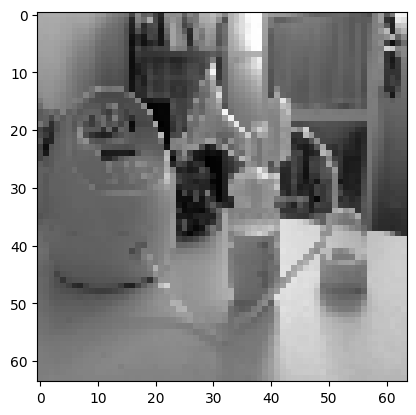

In [ ]:
print("Label:",y_test[299:300])
plt.imshow(x_test[299:300].reshape(64,64), cmap='gray')
plt.show()

In [ ]:
first_layer_size = 256

x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

model = Sequential()
model.add(Dense(first_layer_size,
                activation='sigmoid', input_shape=(64*64,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               1048832   
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 1067690 (4.07 MB)
Trainable params: 1067690 (4.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)
layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(64,64,),cmap='gray')
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1)

Epoch 1/20
18/18 [==============================] - 3s 74ms/step - loss: 2.3207 - accuracy: 0.1199
Epoch 2/20
18/18 [==============================] - 2s 119ms/step - loss: 2.2830 - accuracy: 0.1372
Epoch 3/20
18/18 [==============================] - 1s 37ms/step - loss: 2.2489 - accuracy: 0.1624
Epoch 4/20
18/18 [==============================] - 0s 25ms/step - loss: 2.1989 - accuracy: 0.1810
Epoch 5/20
18/18 [==============================] - 2s 114ms/step - loss: 2.1437 - accuracy: 0.1810
Epoch 6/20
18/18 [==============================] - 2s 100ms/step - loss: 2.0938 - accuracy: 0.2040
Epoch 7/20
18/18 [==============================] - 3s 148ms/step - loss: 2.0345 - accuracy: 0.2217
Epoch 8/20
18/18 [==============================] - 0s 24ms/step - loss: 2.0266 - accuracy: 0.2119
Epoch 9/20
18/18 [==============================] - 2s 123ms/step - loss: 1.9635 - accuracy: 0.2376
Epoch 10/20
18/18 [==============================] - 1s 38ms/step - loss: 1.9419 - accuracy: 0.2584
Epoc

In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.8483424186706543
Test accuracy: 0.12561576068401337


In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(64,64),cmap='gray')
plt.show()

In [ ]:
prediction = model.predict(x_test[79:80])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 1s 1s/step
Prediction
 [0.00596306 0.18919472 0.1781322  0.05471247 0.02634311 0.01447815
 0.18660565 0.11051778 0.19121602 0.04283682]

Thresholded output
 [0 0 0 0 0 0 0 0 0 0]


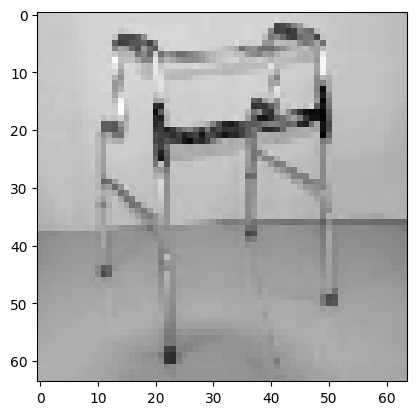

In [ ]:
plt.imshow(x_test[79:80].reshape(64,64),cmap='gray')
plt.show()